In [16]:
# importing necessary modules.
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import databaseconfig as cfg

In [21]:
# creating engine
engine = create_engine(f'{cfg.password}://postgres:postgres@localhost/sql-challenge')

In [22]:
# creating pandas dataframes based on titles and salaries sql dataframes.
titles = pd.read_sql_table('Titles', engine)
salaries = pd.read_sql_table('Salaries', engine)

In [23]:
# verifying salaries data imported correctly.
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,"$60,117.00",1986-06-26,1987-06-26
1,10002,"$65,828.00",1996-08-03,1997-08-03
2,10003,"$40,006.00",1995-12-03,1996-12-02
3,10004,"$40,054.00",1986-12-01,1987-12-01
4,10005,"$78,228.00",1989-09-12,1990-09-12


In [24]:
# verifying titles data imported correctly.
titles.head()

,emp_no,title,from_dat,to_date
0,10001,Senior Engineer,1986-06-26,NaT
1,10002,Staff,1996-08-03,NaT
2,10003,Senior Engineer,1995-12-03,NaT
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,NaT


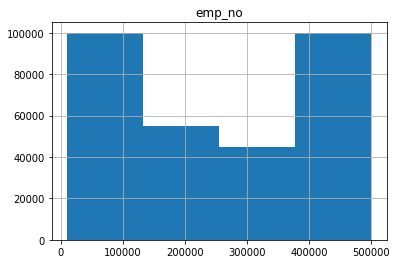

In [25]:
# Create a histogram to visualize the most common salary ranges for employees
hist = salaries.hist(bins=4)

In [26]:
# merging the salaries and titles dataframes.
joined = pd.merge(salaries, titles, on='emp_no')

In [27]:
# verifying merge worked.
joined.head()

,emp_no,salary,from_date,to_date_x,title,from_dat,to_date_y
0,10001,"$60,117.00",1986-06-26,1987-06-26,Senior Engineer,1986-06-26,NaT
1,10002,"$65,828.00",1996-08-03,1997-08-03,Staff,1996-08-03,NaT
2,10003,"$40,006.00",1995-12-03,1996-12-02,Senior Engineer,1995-12-03,NaT
3,10004,"$40,054.00",1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,"$40,054.00",1986-12-01,1987-12-01,Senior Engineer,1995-12-01,NaT


In [28]:
# creating subdataframe called refined.
refined = joined[["title", "salary"]]

In [29]:
# verifying subdataframe.
refined.head()

,title,salary
0,Senior Engineer,"$60,117.00"
1,Staff,"$65,828.00"
2,Senior Engineer,"$40,006.00"
3,Engineer,"$40,054.00"
4,Senior Engineer,"$40,054.00"


In [30]:
# dropping unwanted symbols in salary column and converting the column from object to float.
refined['salary'] = refined['salary'].str.replace('.', '')
refined['salary'] = refined['salary'].str.replace(',', '')
refined['salary'] = refined['salary'].str.replace('$', '')
refined['salary'] = refined['salary'].astype(int)

C:\Users\natha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\natha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\natha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
# getting rid of extra zeros.
refined['salary'] = (refined['salary'])/100

C:\Users\natha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# verifying new table.
refined.head()

,title,salary
0,Senior Engineer,60117.0
1,Staff,65828.0
2,Senior Engineer,40006.0
3,Engineer,40054.0
4,Senior Engineer,40054.0


In [33]:
# verifing salary was changed into float.
refined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 2 columns):
title     443308 non-null object
salary    443308 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.1+ MB


In [34]:
# grouping data by title to find average salary of each title and reseting the title index.
grouped_refined = refined.groupby(['title']).mean().reset_index()

In [35]:
# verifying grouped and average data.
grouped_refined

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


In [36]:
title_table = []
for title in grouped_refined['title']:
    title_table.append(title)

Text(0, 0.5, 'Average Salary ($)')

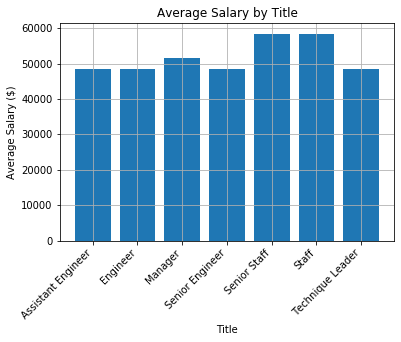

In [37]:
# creating x_axis based on length of title column.
x_axis = np.arange(len(grouped_refined["title"]))
# creating variable that matches x_axis.
tick_locations = [value for value in x_axis]
# attaching title_table to tick_locations.
plt.xticks(tick_locations, title_table, rotation="45", ha='right')
# creating bar chart of title by average salary.
plt.bar(x_axis, grouped_refined['salary'])
# creating grid.
plt.grid()
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')